<a href="https://colab.research.google.com/github/tccnchsu/AI_course_2018/blob/master/Keras_Mnist_MLP_h256%E6%94%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料預處理

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

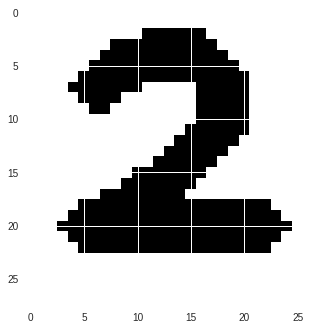

In [0]:
# plot image
import matplotlib.pyplot as plt
from matplotlib.image import imread
img = imread('/content/drive/My Drive/P2.png') # 画像の読み込み
plt.imshow(img)
plt.show()

In [0]:
img

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [0]:
imggray = img[:,:,0]
imggray1 = imggray.reshape(1,784).astype('float32')
imggray1.shape

(1, 784)

In [0]:
imggray1 = 1-imggray1

In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [0]:
myimg_onehot=np.array([0., 0., 1., 0., 0., 0., 0., 0. ,0. ,0.],dtype='float32')
myimg_onehot = myimg_onehot.reshape(1,10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [0]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4379 - acc: 0.8827 - val_loss: 0.2185 - val_acc: 0.9407
Epoch 2/10
 - 2s - loss: 0.1912 - acc: 0.9456 - val_loss: 0.1558 - val_acc: 0.9554
Epoch 3/10
 - 2s - loss: 0.1354 - acc: 0.9618 - val_loss: 0.1258 - val_acc: 0.9645
Epoch 4/10
 - 2s - loss: 0.1026 - acc: 0.9703 - val_loss: 0.1120 - val_acc: 0.9686
Epoch 5/10
 - 2s - loss: 0.0809 - acc: 0.9772 - val_loss: 0.0983 - val_acc: 0.9716
Epoch 6/10
 - 2s - loss: 0.0658 - acc: 0.9818 - val_loss: 0.0934 - val_acc: 0.9720
Epoch 7/10
 - 2s - loss: 0.0542 - acc: 0.9851 - val_loss: 0.0912 - val_acc: 0.9738
Epoch 8/10
 - 2s - loss: 0.0458 - acc: 0.9877 - val_loss: 0.0828 - val_acc: 0.9757
Epoch 9/10
 - 2s - loss: 0.0378 - acc: 0.9903 - val_loss: 0.0825 - val_acc: 0.9762
Epoch 10/10
 - 2s - loss: 0.0316 - acc: 0.9917 - val_loss: 0.0806 - val_acc: 0.9761


# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

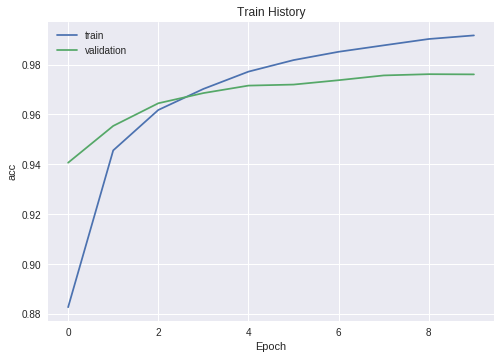

In [0]:
show_train_history(train_history,'acc','val_acc')

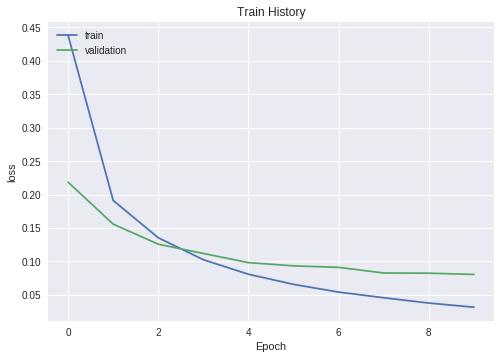

In [0]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [0]:
myimg_onehot.shape

(1, 10)

In [0]:
scores = model.evaluate(imggray1, myimg_onehot)
print()
print('accuracy=',scores[1])

1/1 [==============================] - 0s 1ms/step

accuracy= 1.0


# 進行預測

In [0]:
imggray1.shape

(1, 784)

In [0]:
prediction=model.predict_classes(x_Test)

In [0]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

NameError: ignored

# confusion matrix

In [0]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1008,1,1,0,3,4,9,1
3,0,0,5,992,0,0,0,4,5,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,17,1,852,7,2,7,3
6,6,3,2,1,3,3,938,0,2,0
7,0,5,12,6,1,0,0,990,6,8
8,4,0,3,7,1,1,1,2,954,1


In [0]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [0]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4255,5,3


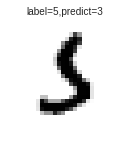

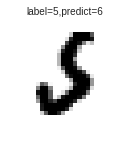

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=9982,num=1)

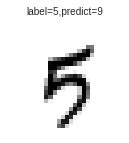

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

In [0]:
ls

drive/  sample_data/


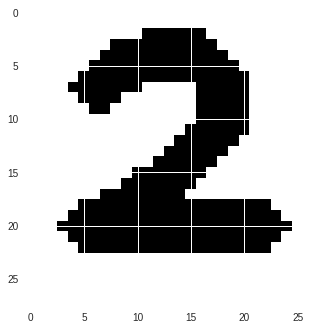

In [0]:
# plot image
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/P2.png') # 画像の読み込み
plt.imshow(img)

plt.show()

In [0]:
img.dtype

dtype('float32')